**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   EQUIPO: 17

*   NOMBRE: David Hernández Castellanos
*   MATRÍCULA: A01795964
---------------------------------------------
*   NOMBRE: Renzo Felipe Chávez Pulgar
*   MATRÍCULA: A01795959
--------------------------------------------
*   NOMBRE: Abel Jhoan Díaz Escalera
*   MATRÍCULA: A00566705
--------------------------------------------
*   NOMBRE: Jessica Giovana García Gómez
*   MATRÍCULA: A01795922
--------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_selector

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
unique=data_df.nunique()
print("Valores únicos por variable")
print(unique)
rows=len(data_df)
print("Número de registros: ", rows)

Valores únicos por variable
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int6

1c) Búsqueda de valores faltantes.

In [ ]:
def completitud(df):
    aux = df.isnull().sum().to_frame("n_nulos")
    aux["porcentaje_nulos"] = aux["n_nulos"]/df.shape[0]
    aux["porcentaje_nulos"] = (aux["porcentaje_nulos"]
                               .apply(lambda x: str(round(x*100, 1))+"%") )
    return aux

completitud(data_df)

,n_nulos,porcentaje_nulos
diagnosis,0,0.0%
radius_mean,0,0.0%
texture_mean,0,0.0%
perimeter_mean,0,0.0%
area_mean,0,0.0%
smoothness_mean,0,0.0%
compactness_mean,0,0.0%
concavity_mean,0,0.0%
concave points_mean,0,0.0%
symmetry_mean,0,0.0%


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

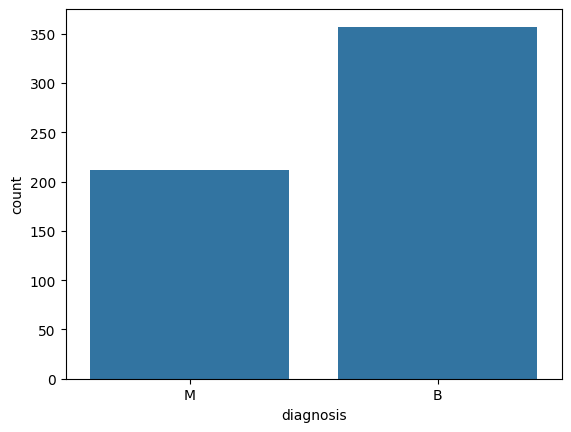

In [ ]:
sns.countplot(x=data_df['diagnosis'], data=data_df)
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

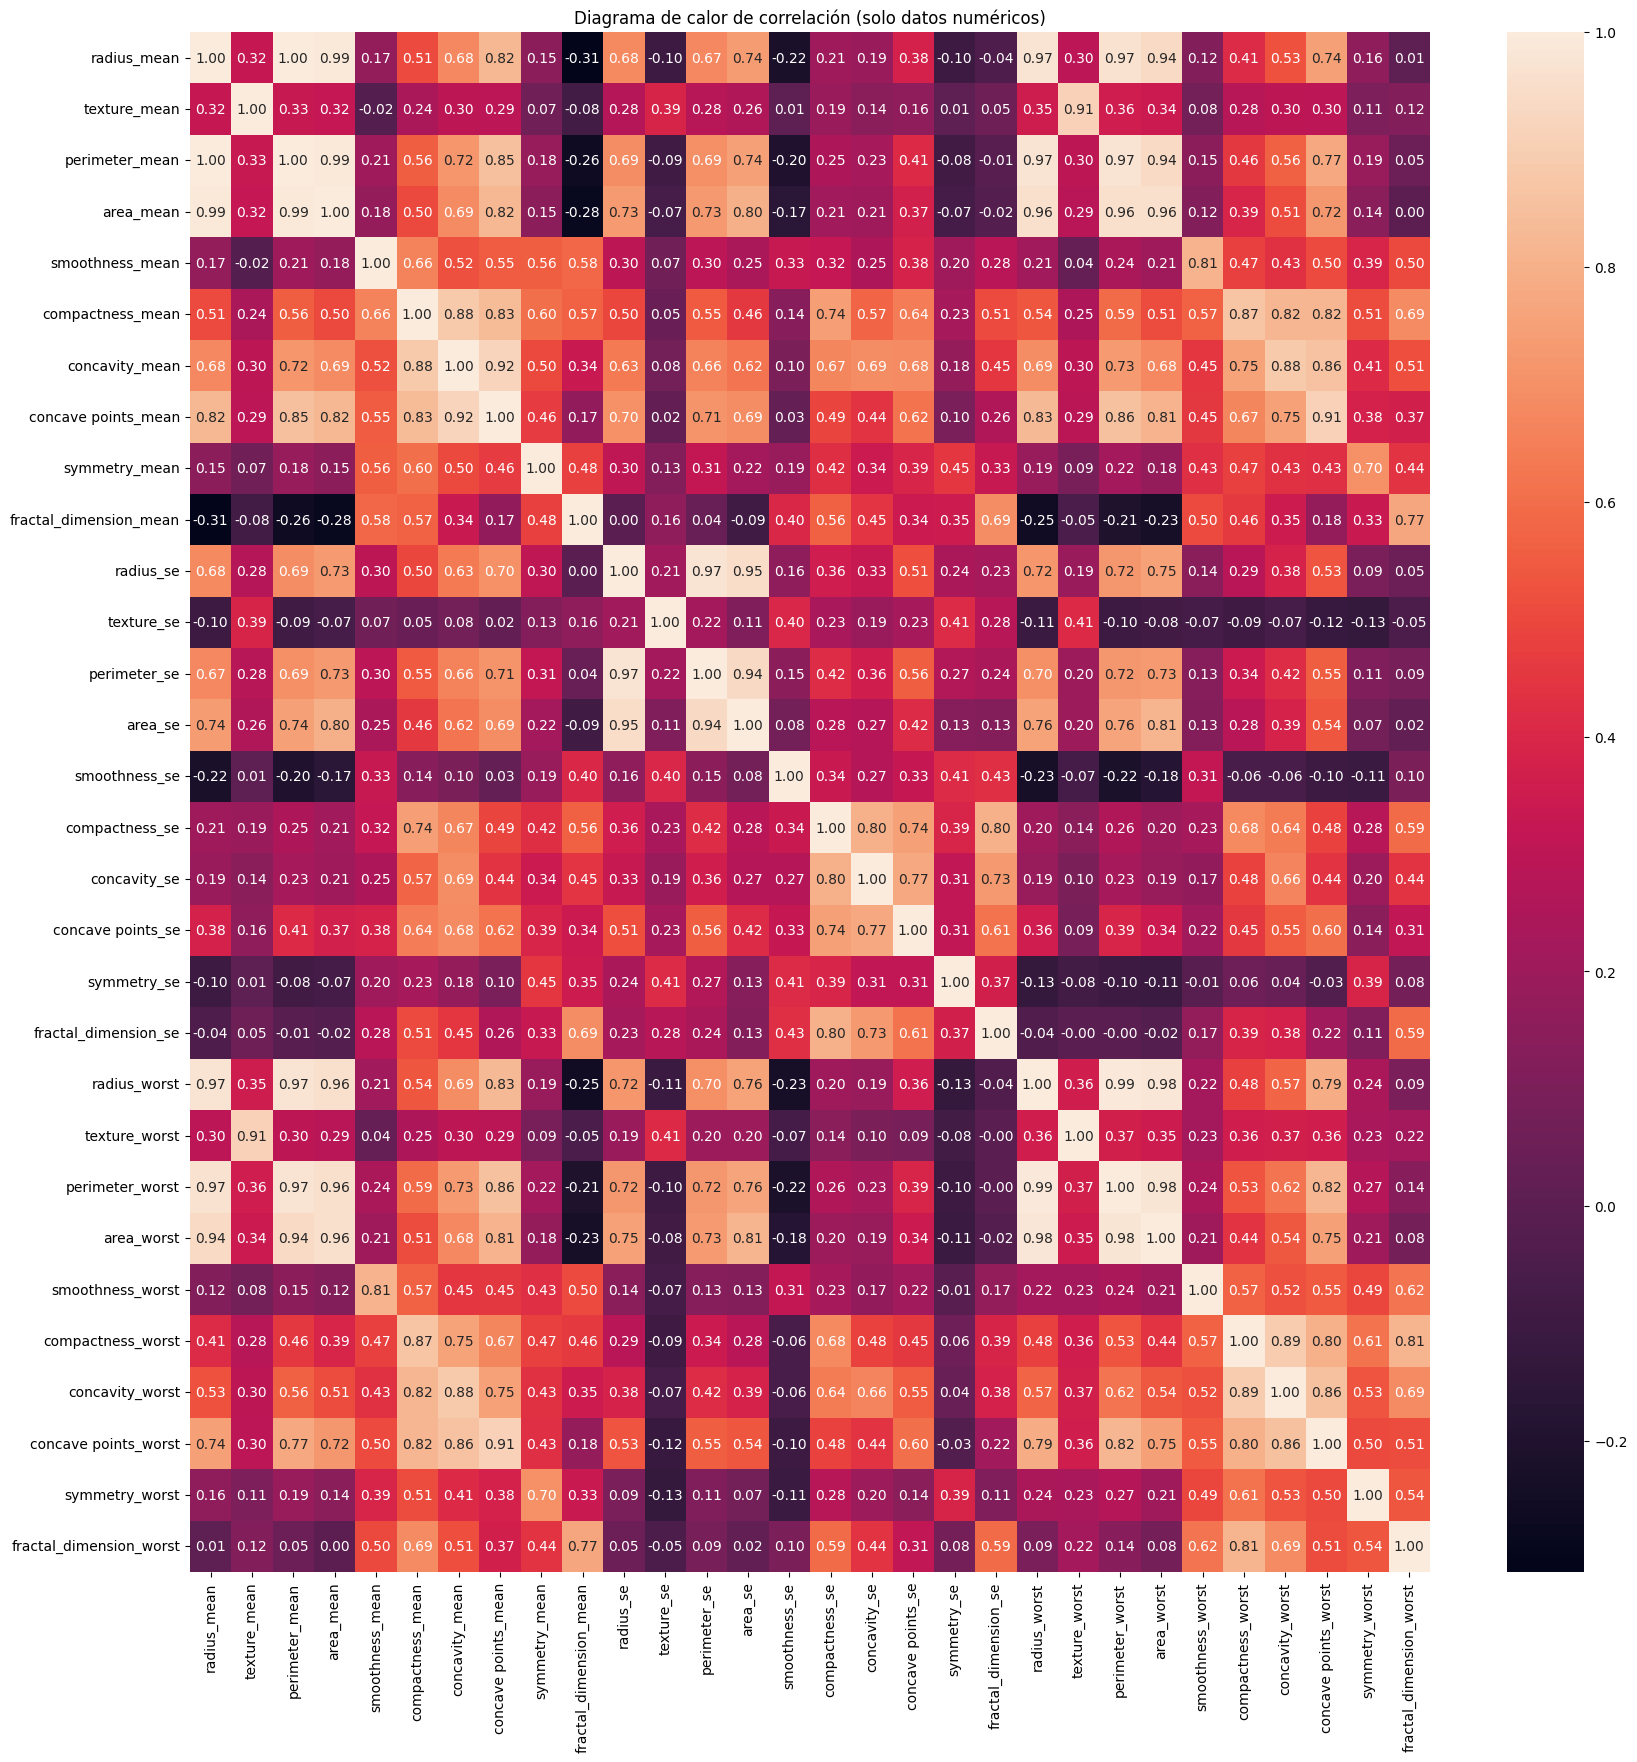

In [ ]:
numeric_df = data_df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"])

plt.figure(figsize=(20, 20))#Modificar aquí el tamaño del mapa
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Diagrama de calor de correlación (solo datos numéricos)')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

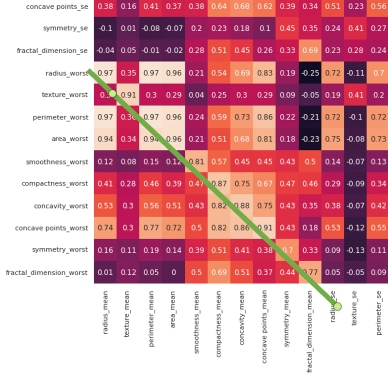

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
# Identificar las columnas que terminan con "_worst"
columns_worst = [col for col in data_df.columns if col.endswith('_worst')]

# Eliminar esas columnas del DataFrame
data_df = numeric_df.drop(columns=columns_worst)
data_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




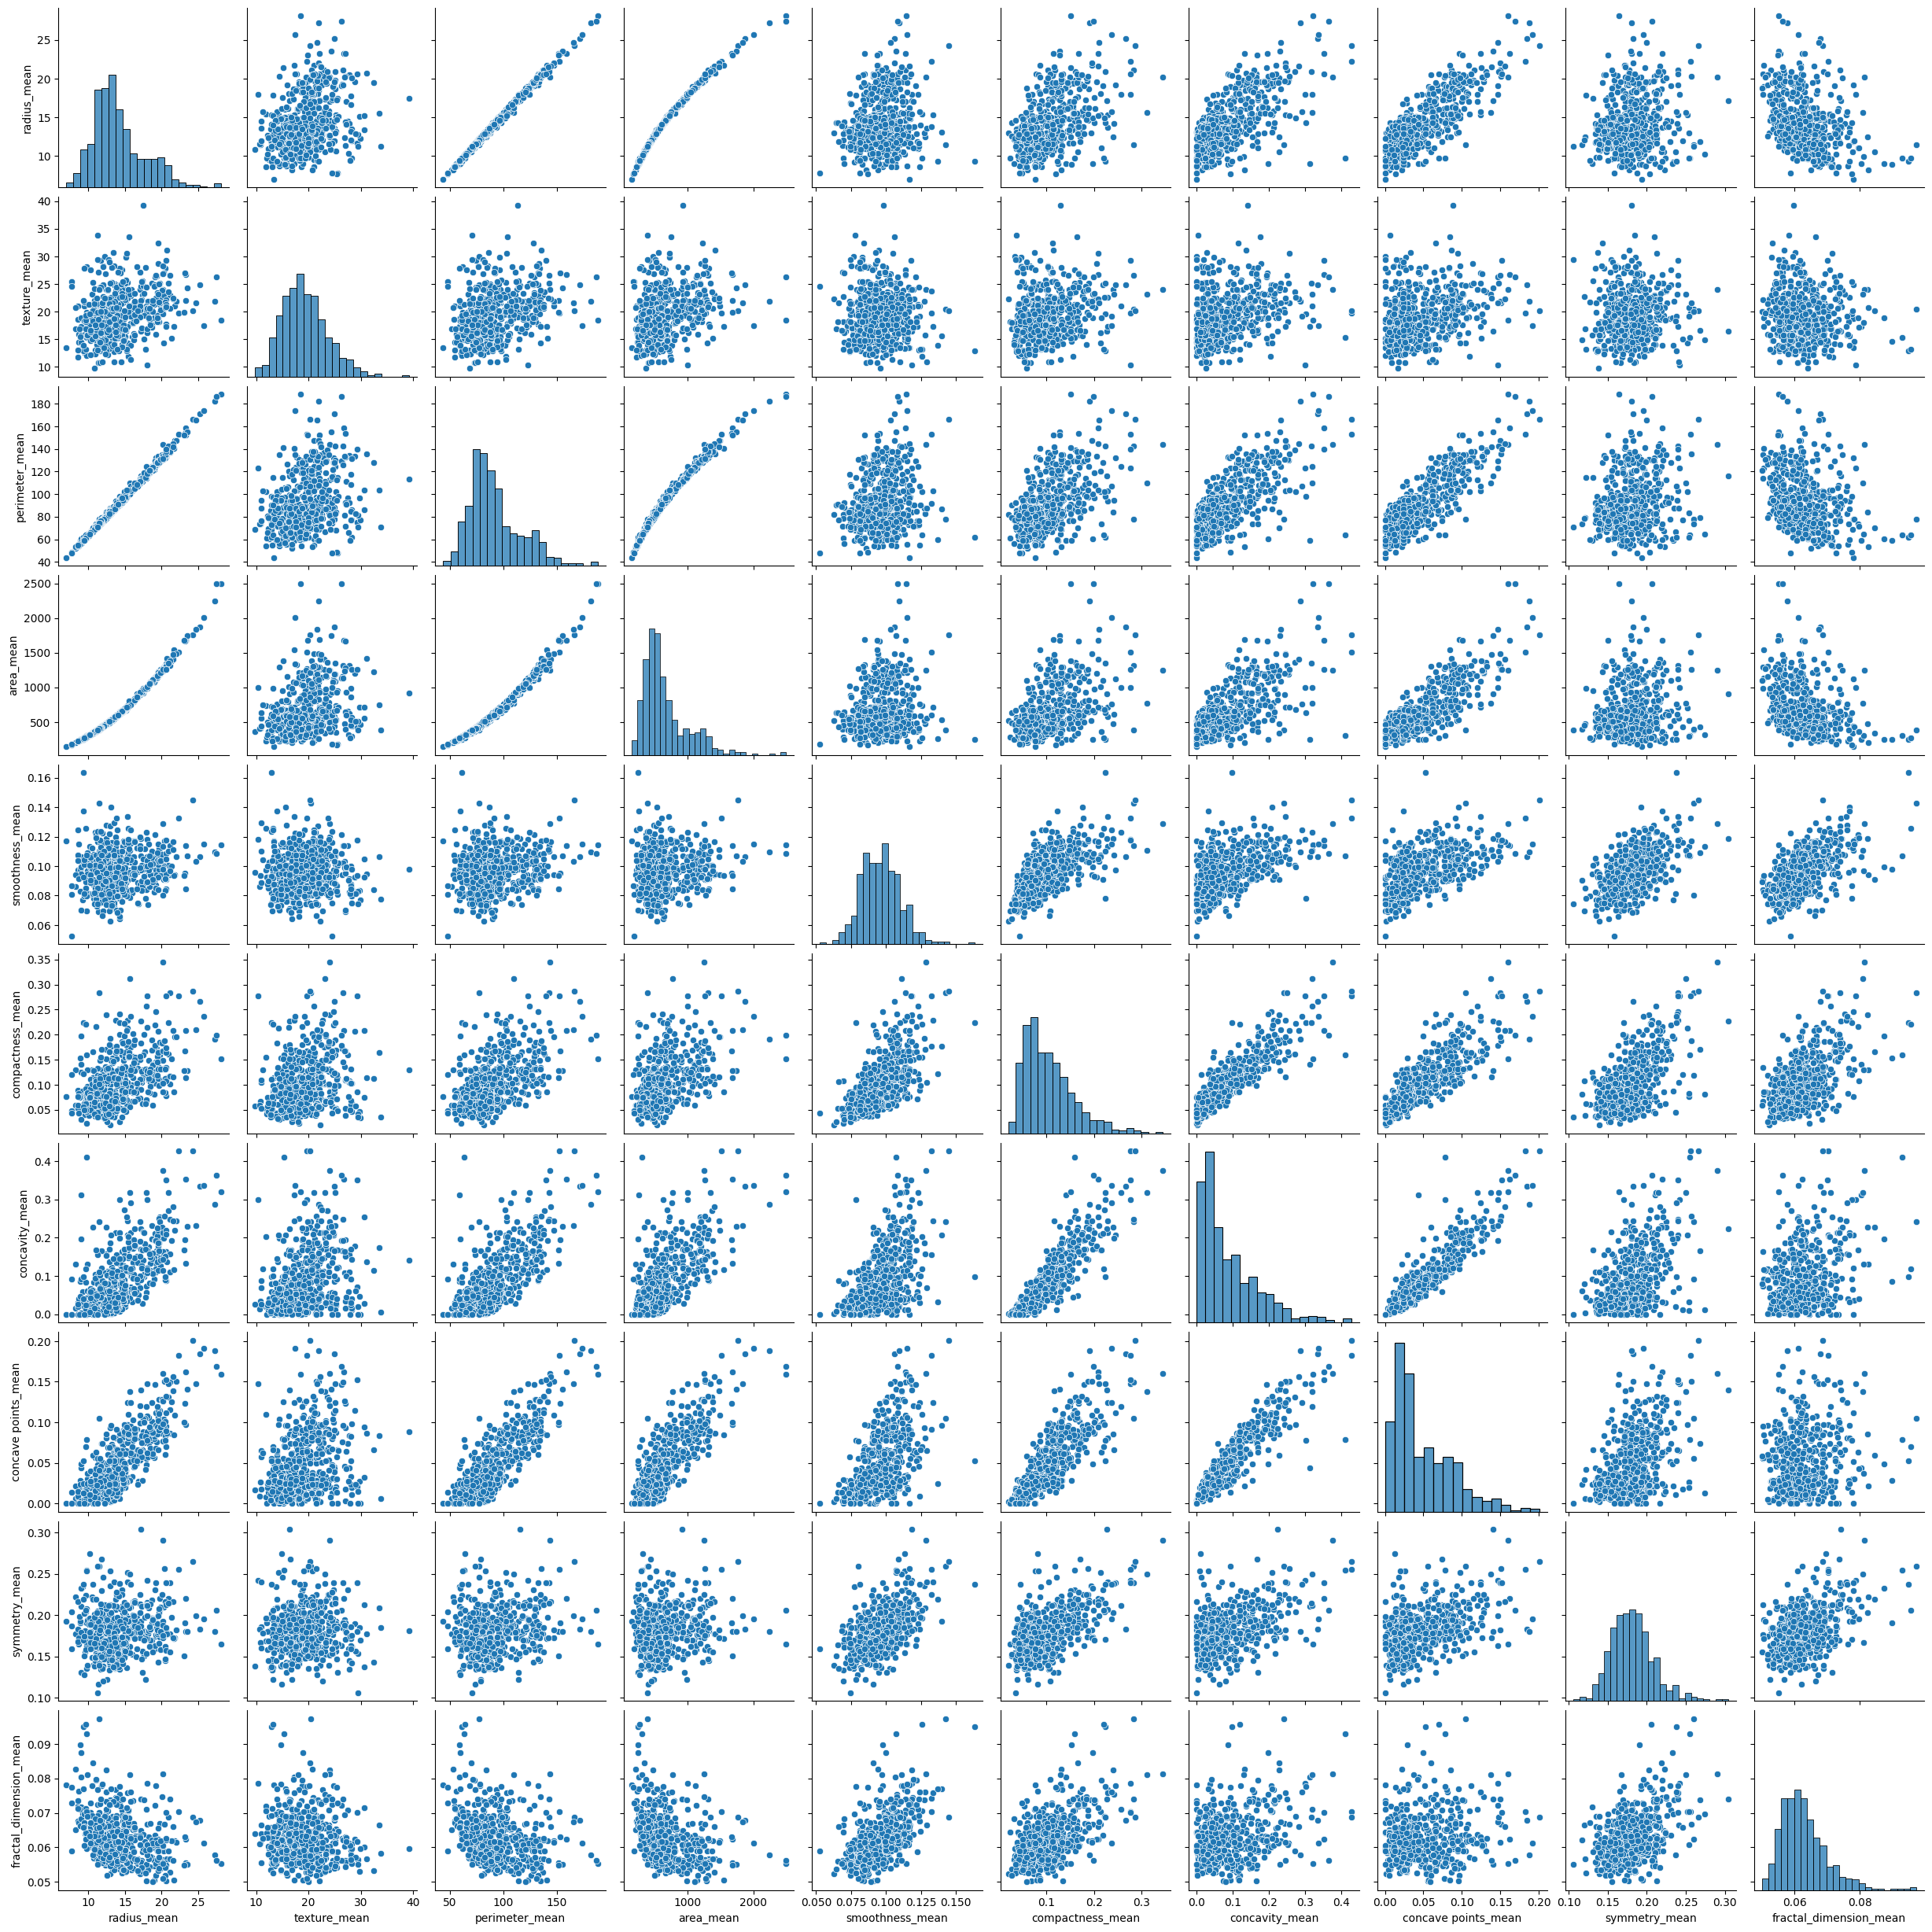

In [ ]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


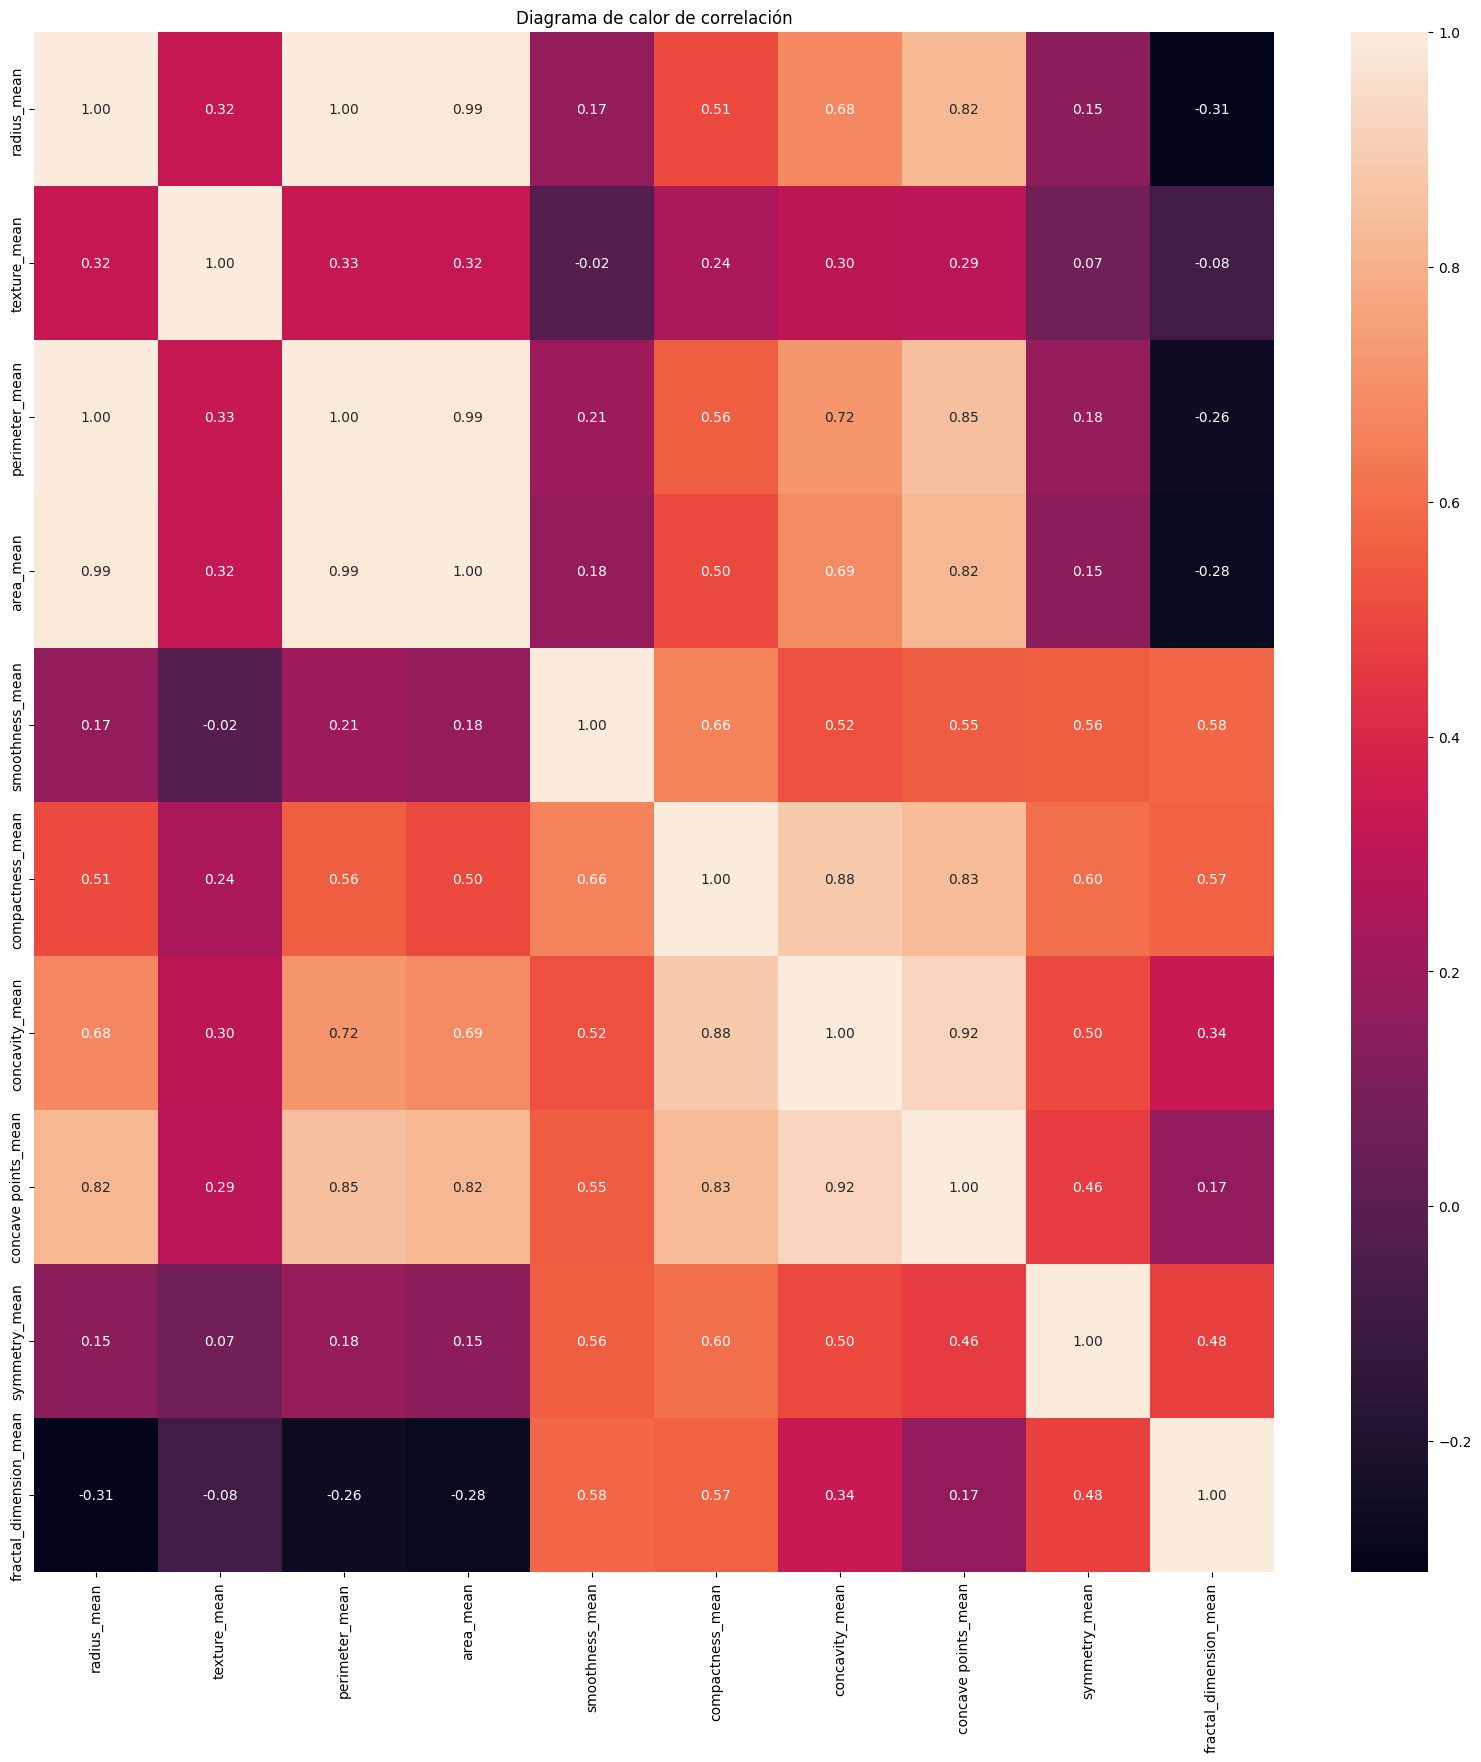

In [ ]:
aux = numeric_df[['radius_mean','texture_mean','perimeter_mean','area_mean',
                  'smoothness_mean','compactness_mean','concavity_mean',
                  'concave points_mean','symmetry_mean',
                  'fractal_dimension_mean']]

plt.figure(figsize=(20, 20))
sns.heatmap(aux.corr(), annot=True, fmt=".2f")
plt.title('Diagrama de calor de correlación')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
data_df = data_df[[x for x in data_df.columns if x.split("_")[0]
                           not in ["perimeter","area","concavity","concave points"]]]

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

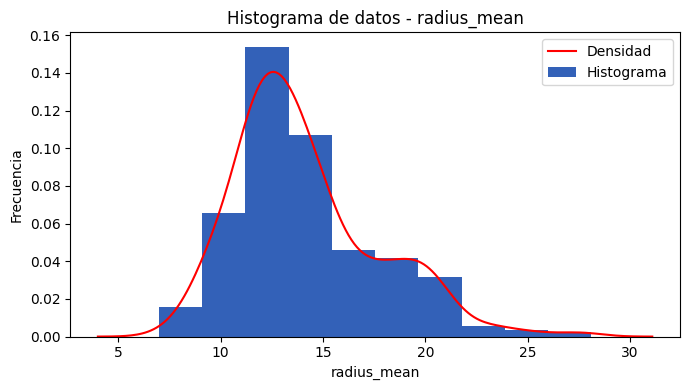

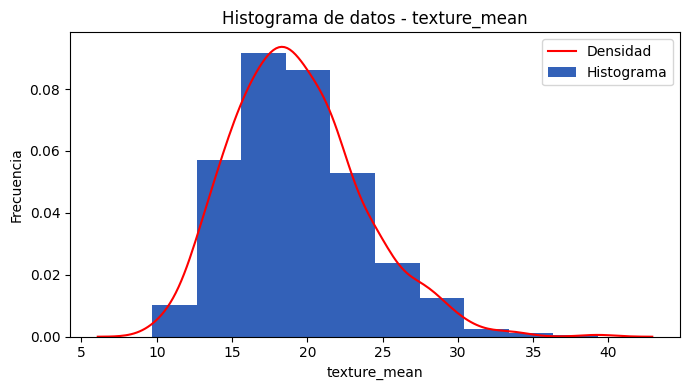

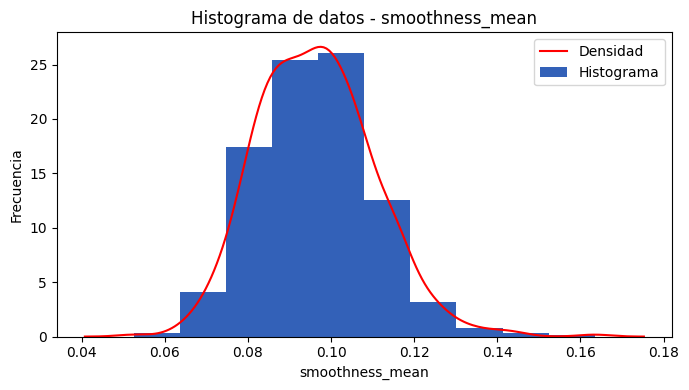

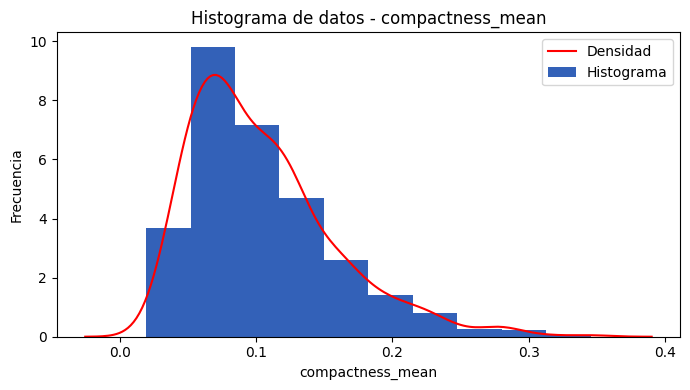

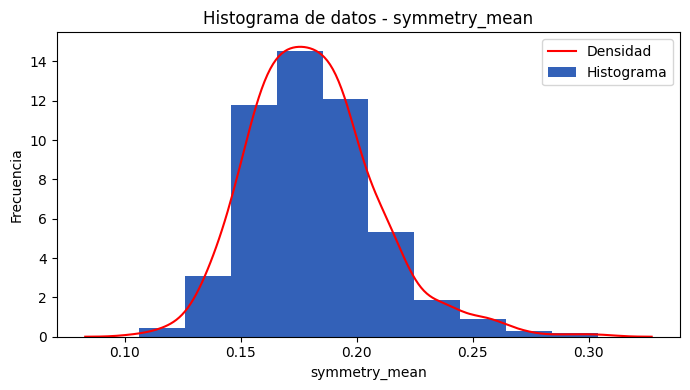

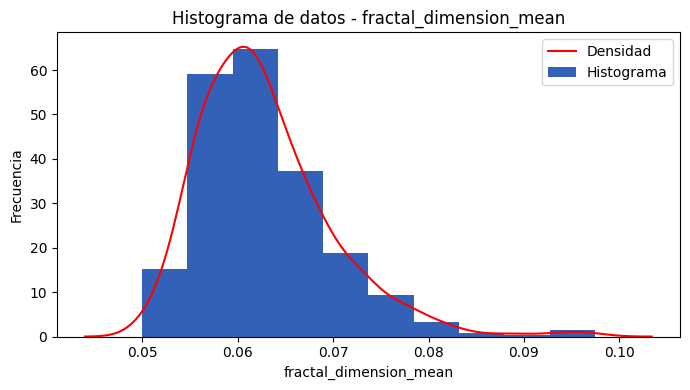

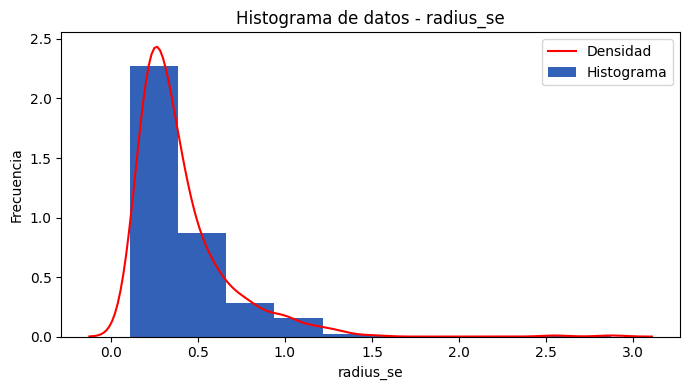

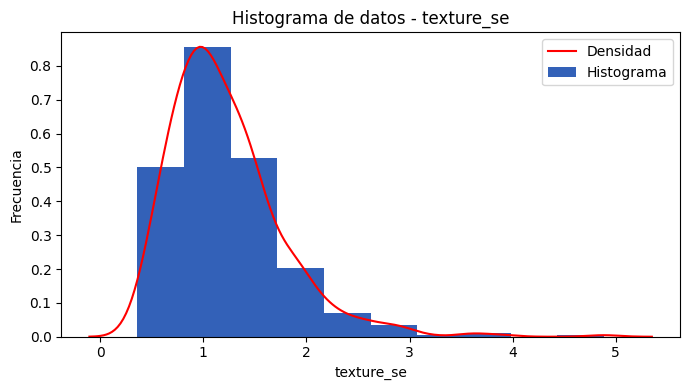

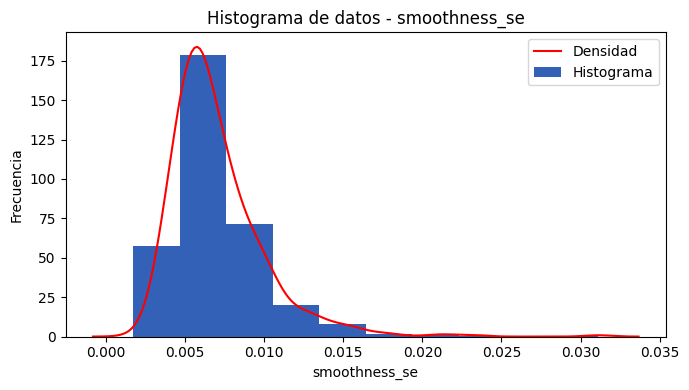

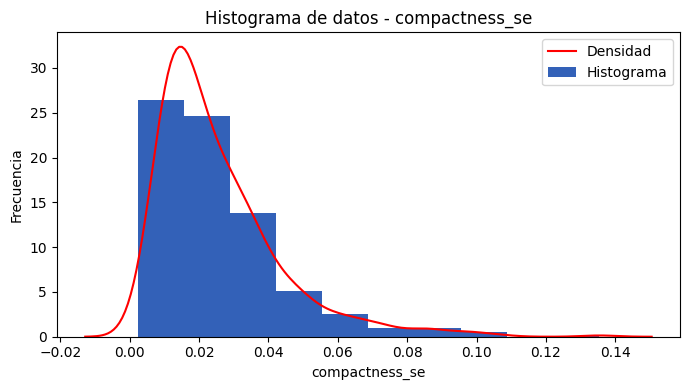

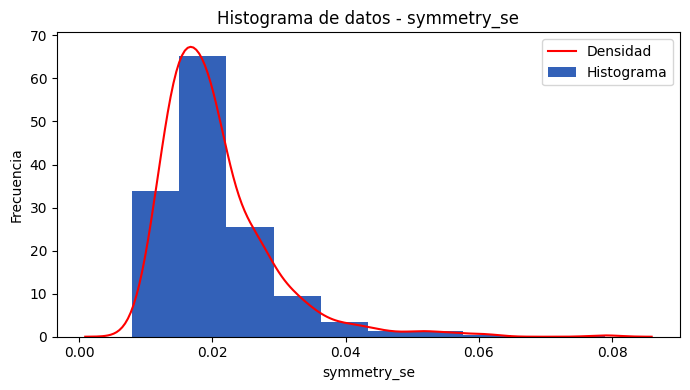

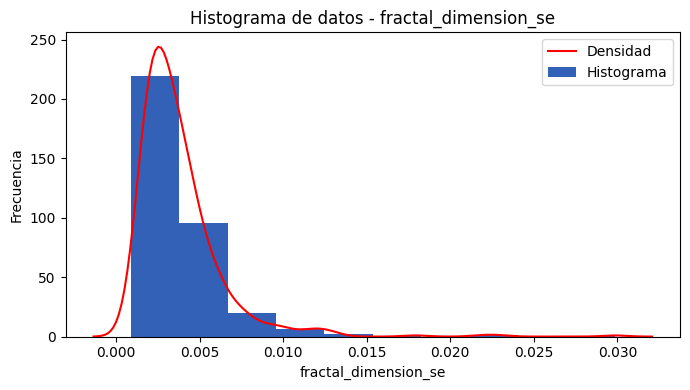

In [ ]:
data_df.shape

def plot_hist(x,df):
    fig, ax = plt.subplots(figsize=(7,4))
    n_bins = 1 + int(np.log2(len(df[x])))
    ax.hist(df[x], bins=n_bins, density=True, color="#0039A6", alpha=0.8)
    sns.kdeplot(df[x],color="red")
    ax.set_facecolor('none')
    plt.title(f'Histograma de datos - {x}')
    ax.set_xlabel(x)
    ax.set_ylabel('Frecuencia')
    plt.legend(["Densidad","Histograma"])
    plt.tight_layout()

for x in data_df.columns:
    print("")
    plot_hist(x,data_df)

In [ ]:
sesgos = data_df.skew()
skew_cols = sesgos[sesgos > 1].index.tolist()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


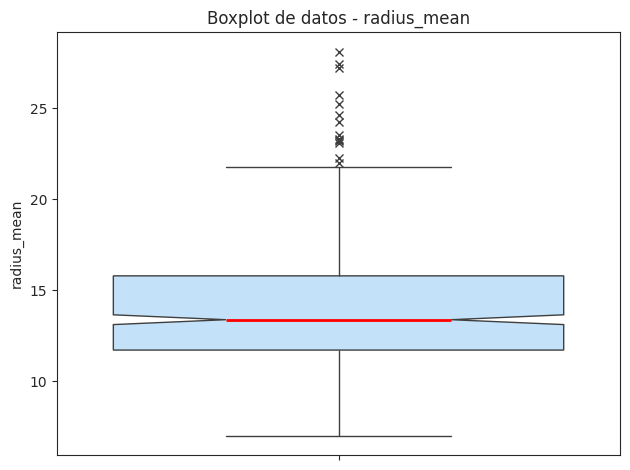

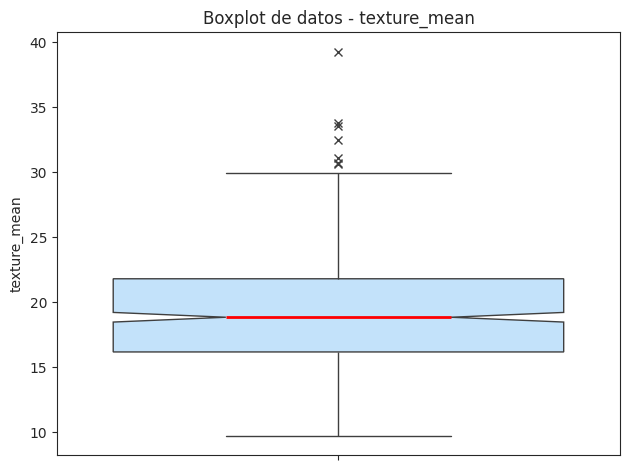

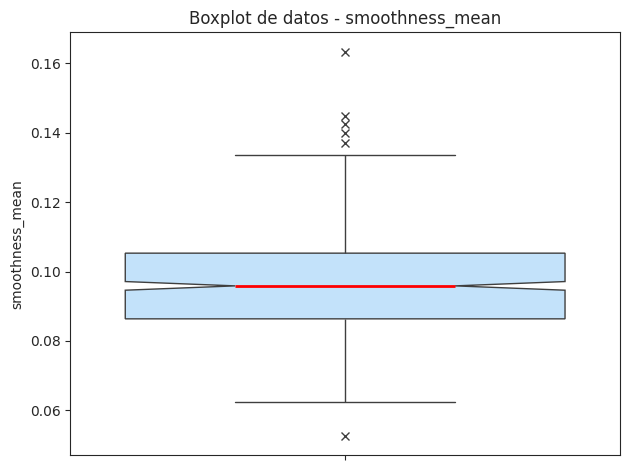

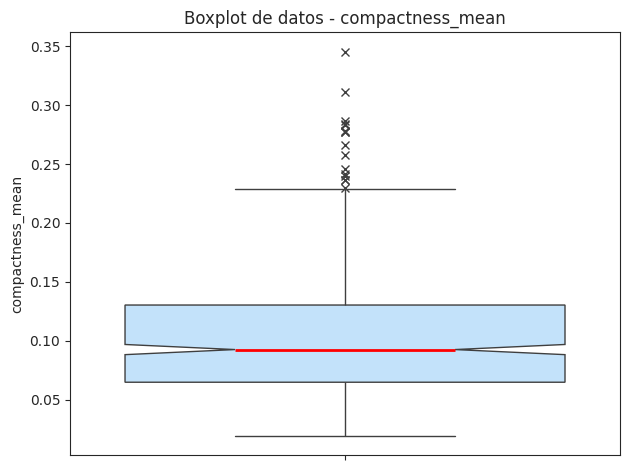

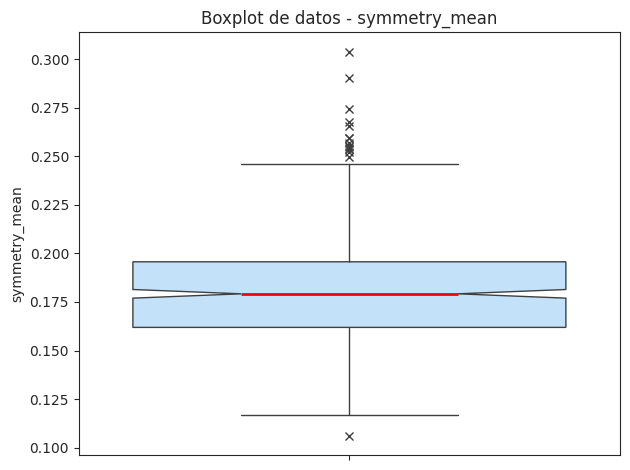

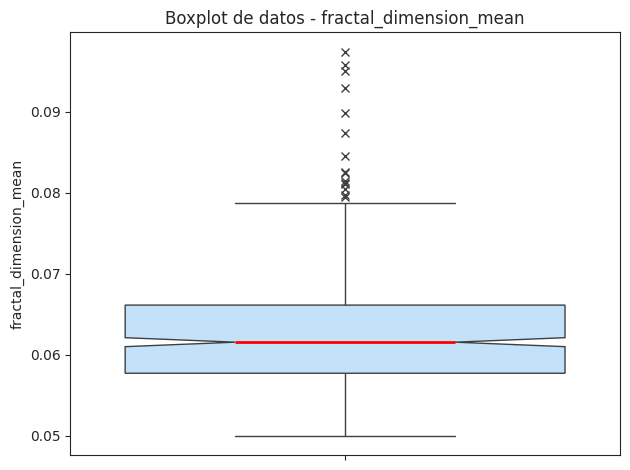

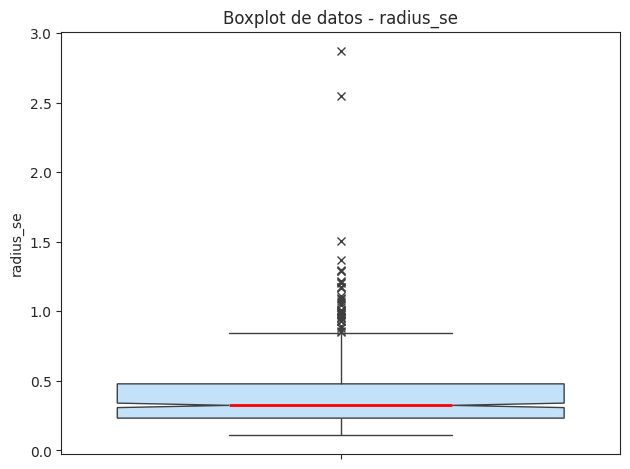

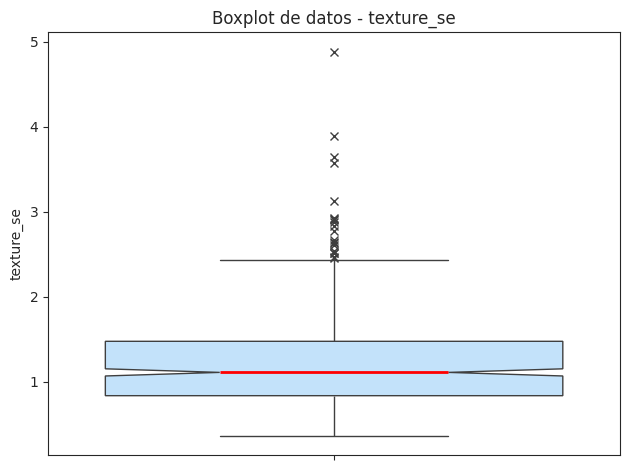

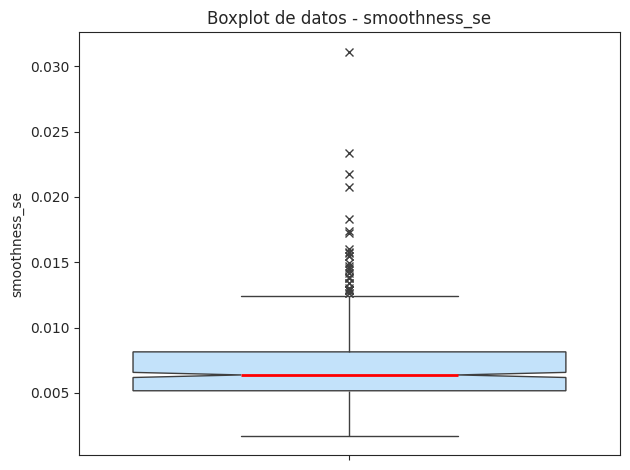

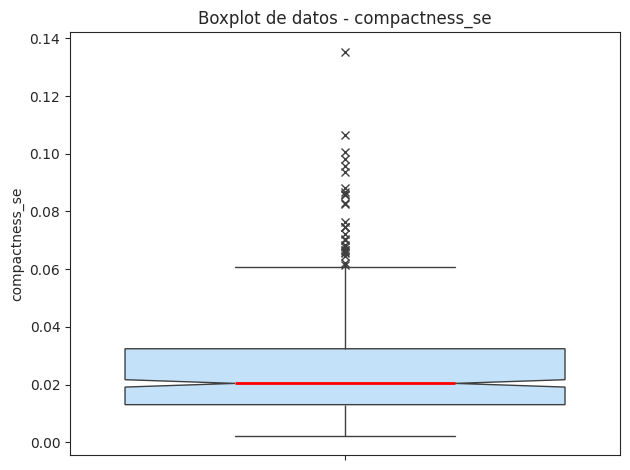

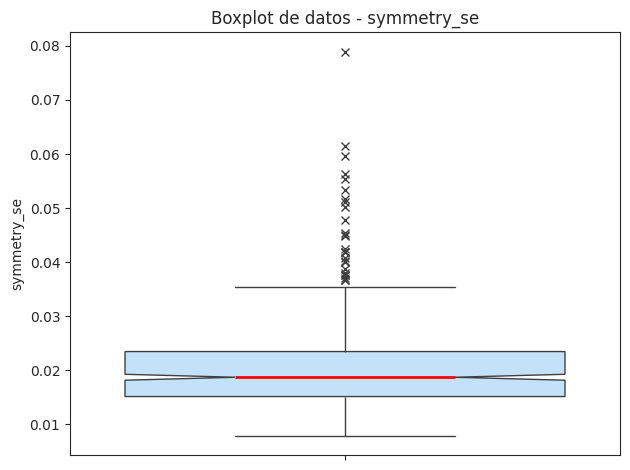

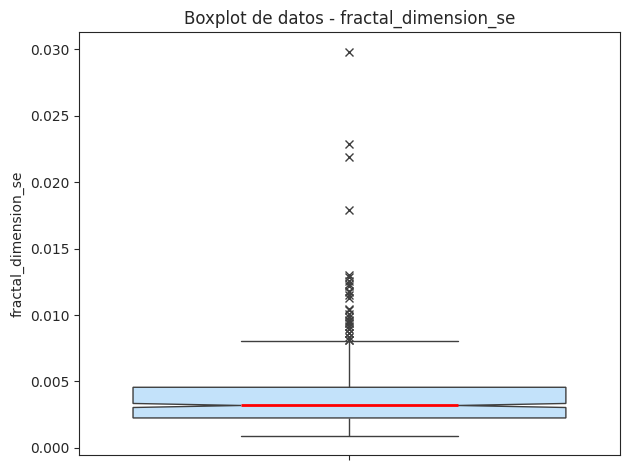

In [ ]:
def box_plot_s(x,df, outliers=True):
     sns.set_style("ticks")
     ax = sns.boxplot(data=df, y=x,
                 notch=True,
                 flierprops={"marker": "x"},
                 boxprops={"facecolor": "#c3e2fa"},
                 medianprops={"color": "r", "linewidth": 2},
                 showfliers=outliers
                 )
     ax.set_facecolor('none')
     plt.title(f'Boxplot de datos - {x}')
     plt.tight_layout()
     plt.show()
for x in data_df.columns:
    print("")
    box_plot_s(x,data_df)

In [ ]:
desc = data_df.describe().T
scale_cols = desc[(desc["min"]<0) | (desc["max"]>1)].index.to_list()

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)
X = data_df.drop(columns="diagnosis", axis=1)
y = data_df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

print("Tamaño del conjunto de entrenamiento: ",X_train.shape[0])
print("Tamaño del conjunto de prueba: ",X_test.shape[0])

Tamaño del conjunto de entrenamiento:  455
Tamaño del conjunto de prueba:  114


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [ ]:
class EliminarColumnasPorPrefijo(BaseEstimator, TransformerMixin):
    def __init__(self, prefijos):
        self.prefijos = prefijos

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        columnas_a_eliminar = [col for col in X.columns if col.split("_")[0]
                               in self.prefijos]
        return X.drop(columns=columnas_a_eliminar, axis=1)


class EliminarColumnasPorSufijo(BaseEstimator, TransformerMixin):
    def __init__(self, sufijo):
        self.sufijo = sufijo

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        columnas_a_eliminar = [col for col in X.columns if
                               col.endswith(self.sufijo)]
        return X.drop(columns=columnas_a_eliminar, axis=1)

eliminar_por_prefijo = EliminarColumnasPorPrefijo(prefijos=["perimeter",
                                                             "area",
                                                             "concavity",
                                                             "concave points"])
eliminar_por_sufijo = EliminarColumnasPorSufijo(sufijo="_worst")


preprocessing = Pipeline([
    ('sufijo', eliminar_por_sufijo),
    ('prefijo', eliminar_por_prefijo)])

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

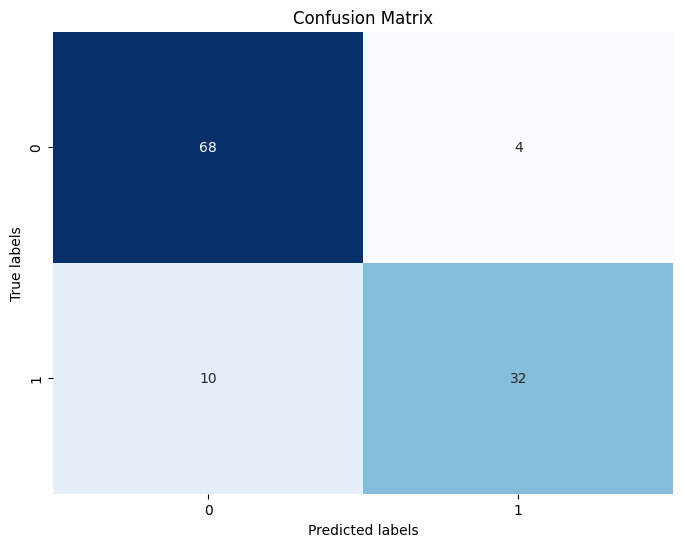

Matriz de confusion:
 [[68  4]
 [10 32]]
Accuracy: 0.8771929824561403

Classification Report:
              precision    recall  f1-score   support

           B       0.87      0.94      0.91        72
           M       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



In [ ]:
logr_model=LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('reduccion', preprocessing),
    ('classifier', logr_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


conf_matrix=confusion_matrix(y_test, y_pred, labels=['B','M'])

# Mostrar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Matriz de confusion:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
transformers = []

skew_transformer = FunctionTransformer(np.sqrt, validate=True)
transformers.append(('sqrt_transform', skew_transformer, skew_cols))

scale_transformer = MinMaxScaler()
transformers.append(('minmax_scale', scale_transformer, scale_cols))

preprocessor = ColumnTransformer(
    transformers=transformers
)

preprocessing = Pipeline([
    ('sufijo', eliminar_por_sufijo),
    ('prefijo', eliminar_por_prefijo),
    ('preprocessor', preprocessor)])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

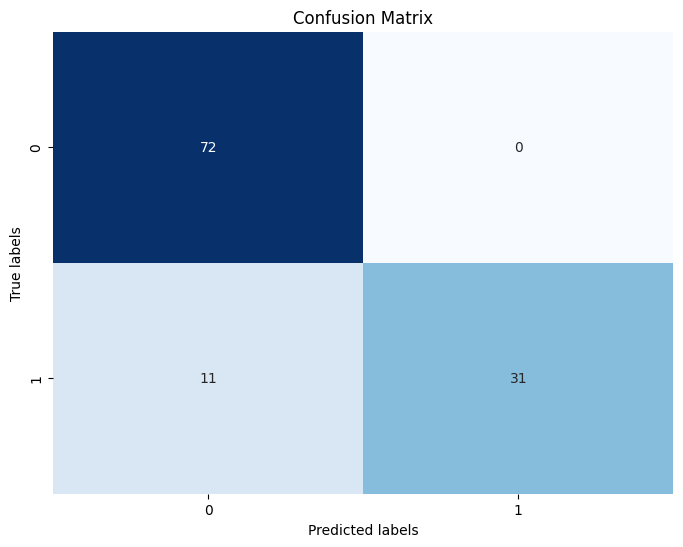

Matriz de confusion:
 [[72  0]
 [11 31]]
Accuracy: 0.9035087719298246

Classification Report:
              precision    recall  f1-score   support

           B       0.87      1.00      0.93        72
           M       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [ ]:
logr_model2 = Pipeline([
    ('reduccion', preprocessing),
    ('classifier', LogisticRegression())
])
logr_model2.fit(X_train, y_train)
y_pred = logr_model2.predict(X_test)


conf_matrix=confusion_matrix(y_test, y_pred, labels=['B','M'])

# Mostrar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Matriz de confusion:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

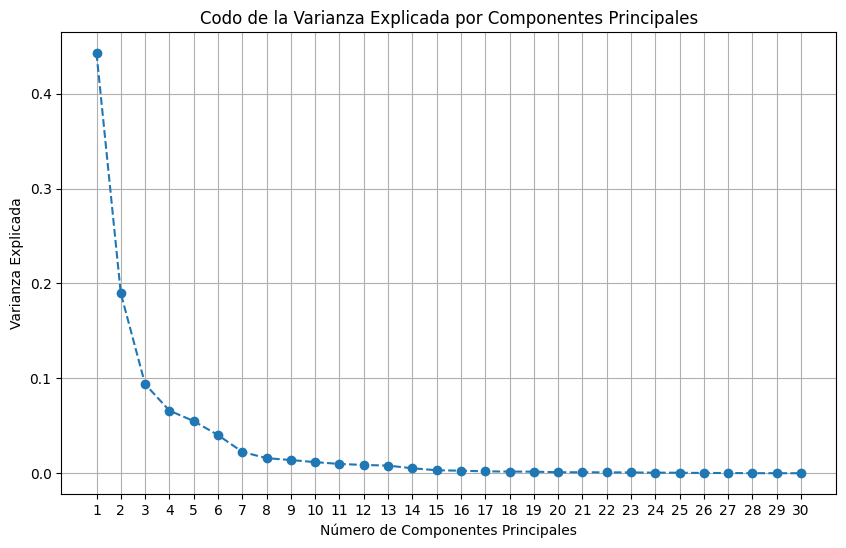

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Codo de la Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

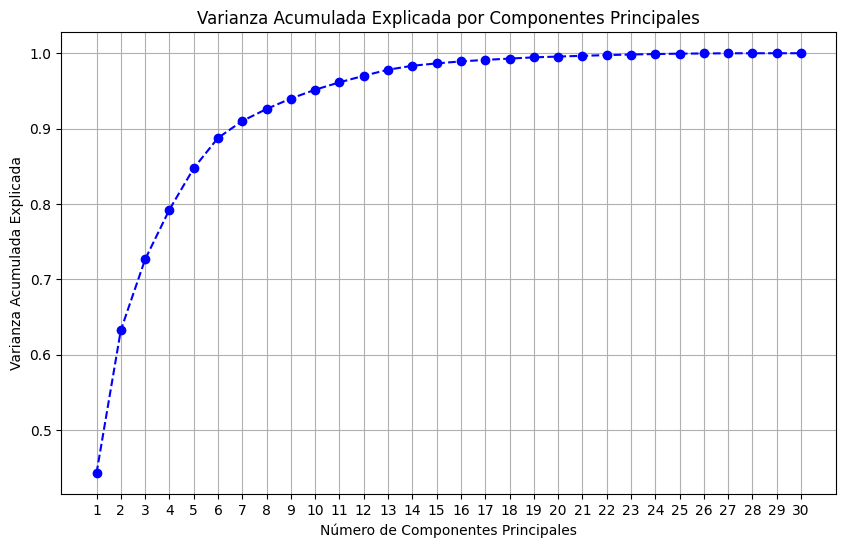

In [ ]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.99) + 1

print(f'Número de componentes para explicar el 99% de la varianza: {n_components}')

Número de componentes para explicar el 99% de la varianza: 17


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

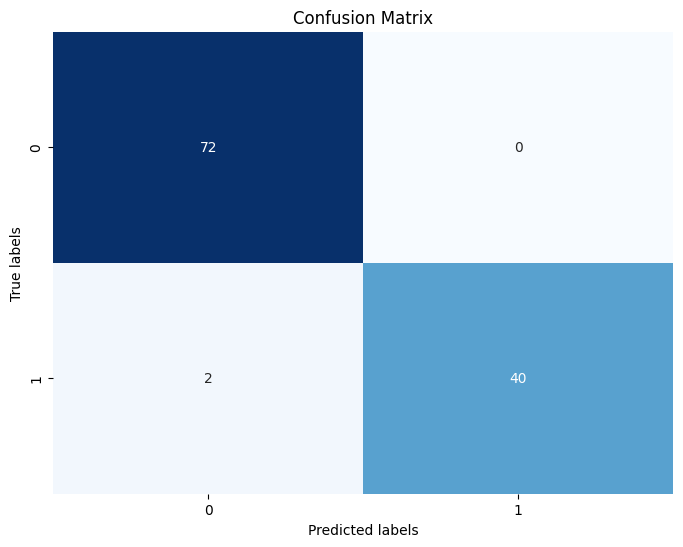

Matriz de confusion:
 [[72  0]
 [ 2 40]]
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('logistic', LogisticRegression(max_iter=1000))
])
logr_model3.fit(X_train, y_train)
y_pred = logr_model3.predict(X_test)
conf_matrix=confusion_matrix(y_test, y_pred, labels=['B','M'])

# Mostrar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print("Matriz de confusion:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

La métrica más importante en un modelo de diagnostico médico es recall (Foco en falsos negativos) dado que es crucial detectar la posible enfermedad de un paciente con la mayor certeza.
La forma en que podemos apoyar al modelo con el umbral o threshold es disminuyendo el umbral para que el modelo sea más sensible a indicar un positivo y así tratar de indentificar de una manera más ácida posibles enfermedades, si bajamos el corte un mayor número de casos podrían activarse como alerta de presencia de enfermedad y ayudar a emitir esos avisos.